In [55]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi

In [61]:
# Dimensions
dimensions = 2

# groups
groups = 8

# Radious
r = 2

# Cycles:
cycles = 8

# n?
n=0.1

max_group = 2*r

In [57]:
def show_points_2d(points, marker='o', color = 'blue'):
    x = tuple([x[0] for x in points])
    y = tuple([x[1] for x in points])

    plt.plot(x, y, marker, color=color)
    plt.show()

def show_points_group_2d(points_group, marker='o', colors = ['blue', 'red']):
    for points_id in range(len(points_group)):
        x = tuple([x[0] for x in points_group[points_id]])
        y = tuple([x[1] for x in points_group[points_id]])

        plt.plot(x, y, marker, color=colors[points_id])
    plt.show()

def generate_groups(groups, r, p_dist, max_group):
    groups_mid = []
    attempt = 0
    for gr in range(groups):
        attempt = 0
        while(attempt < 1000):
            gr = np.array((np.random.rand() * max_group + r, np.random.rand() * max_group + r))
            for point in groups_mid:
                point = np.array(point)
                dist = np.linalg.norm(point - gr)
                if dist < p_dist:
                    attempt += 1
                    if attempt > 1:
                        attempt = 0
                        max_group += 1
                    break
            else:
                attempt += 1
                if attempt > 100:
                    attempt = 0
                    max_group += 1
                break    

        groups_mid.append((gr))
        
    return tuple(groups_mid)

def random_points_in_range(o_points, n, r):
    points = []

    for o_point in o_points:
        for point in range(n):
            distance = np.random.rand() * r
            angle = np.random.rand() * 2 * pi 
            point_x = np.array(o_point[0] + distance * cos(angle))
            point_y = np.array(o_point[1] + distance * sin(angle))

            points.append(tuple((point_x, point_y)))

    return points



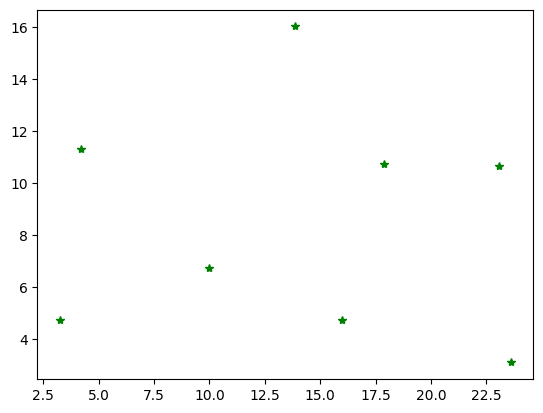

In [58]:
group_mid = generate_groups(groups, r, 2*r + 1, max_group)

show_points_2d(group_mid, '*', 'green')

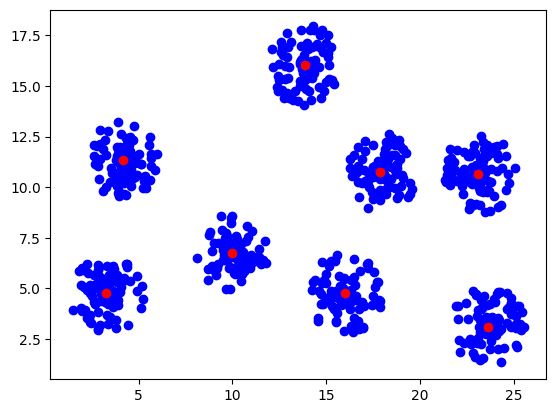

In [59]:
points = random_points_in_range(group_mid, 100, r)

show_points_group_2d([points, group_mid])

w: 2
w: [[14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]
 [14.0184915   8.50778103]]
mean: [14.0184915   8.50778103]
len: 800


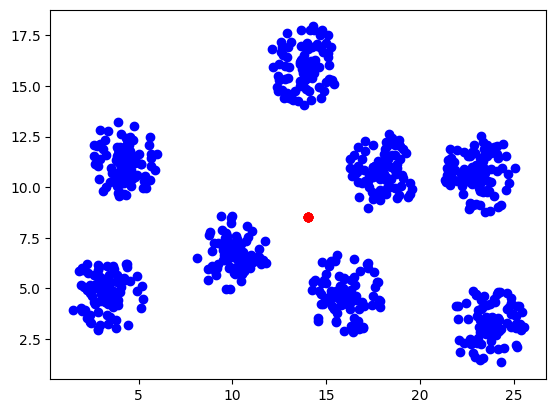

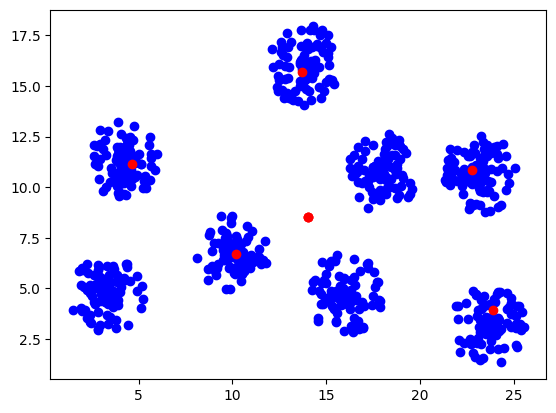

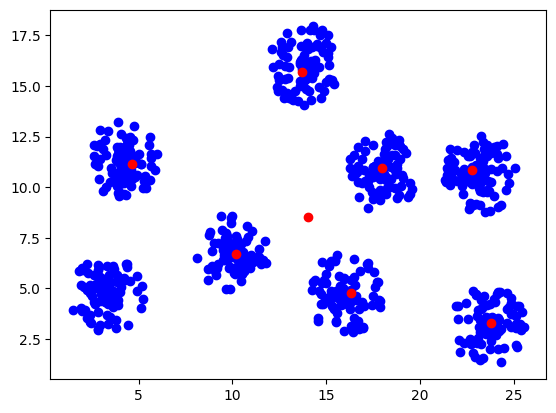

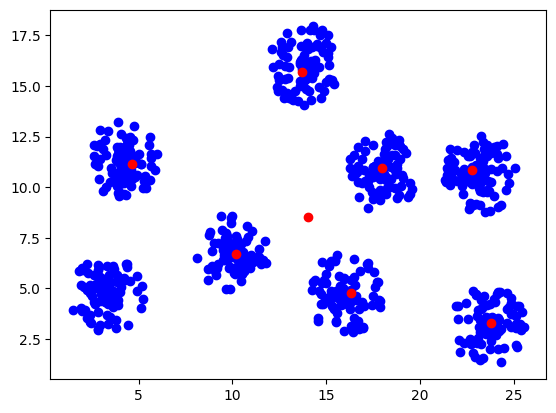

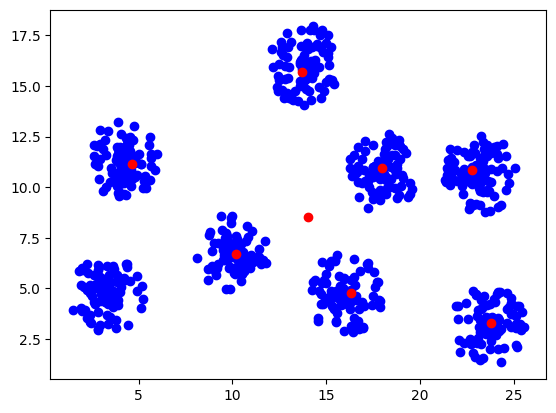

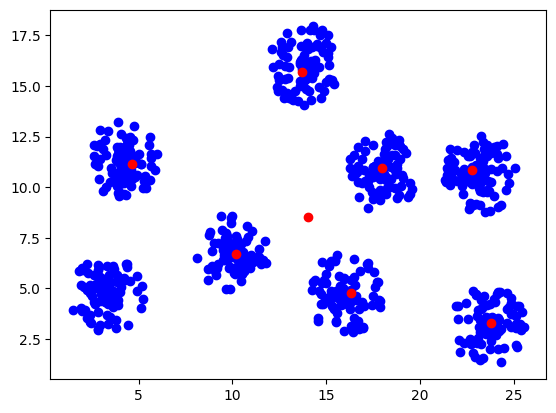

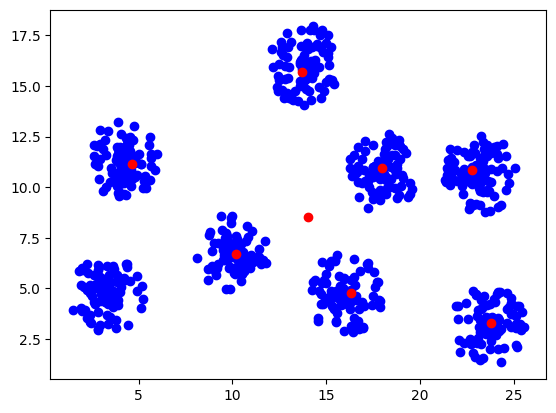

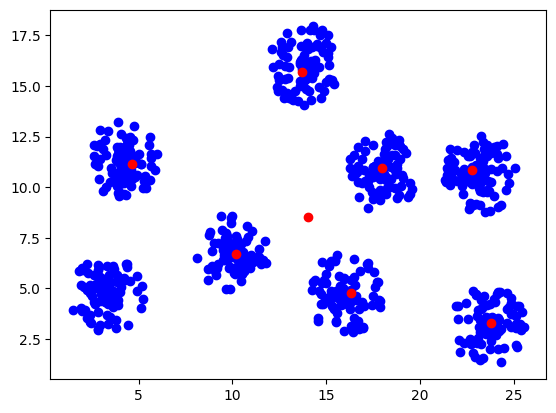

[[ 4.66169196 11.12228096]
 [10.16686186  6.70959732]
 [23.80154503  3.27130579]
 [13.68499942 15.70595754]
 [22.76423911 10.82092558]
 [16.30013847  4.75680444]
 [17.98650375 10.92216475]
 [14.0184915   8.50778103]]


In [65]:
def calculate_new_weights(w, points):
    groups, dimensions = np.shape(w)

    # 1. Obliczanie podobieństwa między neuronami
    dist_table = np.array([0.0 for i in range(groups)])

    for point in points:
        # print (f'point: {point}')
        for d_n in range(groups):
            # Reset do zera przed sumowaniem odleglosci na kolejnych wymiarach
            dist_table[d_n] = 0
            for dim in range(dimensions):
                dist_table[d_n] += (point[dim] - w[d_n][dim])**2
        
        # wybór najblizszego punktu
        close_id = np.argmin(dist_table)
        # print(f'close_id: {close_id}')

        # Nowa Waga
        for dim in range(dimensions):
            w[close_id][dim] = w[close_id][dim] + n * (point[dim]-w[close_id][dim])

    return w


# wagi
w = np.asanyarray([(np.mean(points, axis = 0)) for i in range(groups)])

#w = np.asanyarray([([0.0, 0.0]) for i in range(groups)])

print(f'w: {np.shape(w)[1]}')
print(f'w: {w}')
print(f'mean: {np.mean(points, axis = 0)}')
print(f'len: {len(points)}')

for i in range(cycles):

    show_points_group_2d([points, w])
    w = calculate_new_weights(w, points)

print(w)